In [95]:
import matplotlib.pyplot as plt
import numpy as np
from math import pow, cos, sin, sqrt, pi, sqrt
import scipy as sp
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import time

In [96]:
Nx=15
Ny=15
a=1
V0=-10
Vn=0
t=0

In [97]:
kx=np.zeros(Nx)
ky=np.zeros(Ny)

for rx in range(0,Nx):
    kx[rx] =  2*pi*(rx)/(a*(Nx-1))
for ry in range(0,Ny):
    ky[ry] =  2*pi*(ry)/(a*(Ny-1))
    
    
#for rx in range(0,Nx):
#    kx[rx] = -pi/a + 2*pi*(rx)/(a*(Nx-1))
#for ry in range(0,Ny):
#    ky[ry] = -pi/a + 2*pi*(ry)/(a*(Ny-1))

In [98]:
kx

array([0.        , 0.44879895, 0.8975979 , 1.34639685, 1.7951958 ,
       2.24399475, 2.6927937 , 3.14159265, 3.5903916 , 4.03919055,
       4.48798951, 4.93678846, 5.38558741, 5.83438636, 6.28318531])

In [99]:
ky

array([0.        , 0.44879895, 0.8975979 , 1.34639685, 1.7951958 ,
       2.24399475, 2.6927937 , 3.14159265, 3.5903916 , 4.03919055,
       4.48798951, 4.93678846, 5.38558741, 5.83438636, 6.28318531])

In [100]:
#se construye la matriz que se usará para relacionar los indices de V(i,j) con sus valores dados
p=np.zeros(Nx*Ny)
b=0
for rx in range(0,Nx):
    for ry in range(0,Ny):
        p[b]=b+1
        b=b+1
q = np.zeros((Nx,Ny))
c=0
for nx in range(0,Nx):
    for ny in range(0,Ny):
        q[nx][ny] = p[c]
        c=c+1

In [101]:
q

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.],
       [ 16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
         27.,  28.,  29.,  30.],
       [ 31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,
         42.,  43.,  44.,  45.],
       [ 46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
         57.,  58.,  59.,  60.],
       [ 61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
         72.,  73.,  74.,  75.],
       [ 76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
         87.,  88.,  89.,  90.],
       [ 91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
        102., 103., 104., 105.],
       [106., 107., 108., 109., 110., 111., 112., 113., 114., 115., 116.,
        117., 118., 119., 120.],
       [121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135.],
       [136., 137., 138., 139., 140.,

In [102]:
#se define la matriz i y j de dimension NxN=N**2
def i(rx,ry):
    return q[rx,ry]
def j(rx,ry):
    return q[rx,ry]

In [103]:
i(0,0)

1.0

In [104]:
j(0,0)

1.0

In [105]:
#relacionamos cada elemento de la matriz con sus indices
def find(element, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == element:
                return (i, j)

In [106]:
#mostramos la matriz N**2 X N**2
def V(i,j):
    k1=find(i,q)
    k2=find(j,q)
    
    kx1=kx[k1[0]]
    ky1=ky[k1[1]]
    
    kx2=kx[k2[0]]
    ky2=ky[k2[1]]
    return V0+Vn*(cos((kx1-kx2)*a)+cos((ky1-ky2)*a))

In [107]:
#se muestra la función V en forma matricial
Vm = np.zeros((Nx**2,Ny**2))
for m in range(0,Nx*Nx):
    for n in range(0,Ny*Ny):
        Vm[m][n] = V(m+1,n+1)

In [108]:
Vm
#se ve que debido a que Vn=0 y V0=-10, entonces todos los elementos
#de la matriz potencial será igual a -10

array([[-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       ...,
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.],
       [-10., -10., -10., ..., -10., -10., -10.]])

In [109]:
#mostramos la función de energía cinética E
def E(i):
    k1=find(i,q)
    
    kx1=kx[k1[0]]
    ky1=ky[k1[1]]
    return -2*t*(cos(kx1*a)+cos(ky1*a))

In [110]:
E(1)

0.0

In [111]:
#se añade un factor complejo a la energía
eta = 0.5
cpj= complex(0,1)

In [112]:
#mostramos la función K, que depende de w
def K(i,j,w):
    return V(i,j)/((w-2*E(j)+cpj*eta))

In [113]:
#se da a función K en forma matricial que depende de w
U = np.zeros((Nx**2, Ny**2), dtype=complex)
def Km(w):
    for nx in range(0,Nx**2):
        for ny in range(0,Ny**2):
            U[nx][ny] = K(nx+1,ny+1,w)
    return U

In [114]:
Km(1)

array([[-8.+4.j, -8.+4.j, -8.+4.j, ..., -8.+4.j, -8.+4.j, -8.+4.j],
       [-8.+4.j, -8.+4.j, -8.+4.j, ..., -8.+4.j, -8.+4.j, -8.+4.j],
       [-8.+4.j, -8.+4.j, -8.+4.j, ..., -8.+4.j, -8.+4.j, -8.+4.j],
       ...,
       [-8.+4.j, -8.+4.j, -8.+4.j, ..., -8.+4.j, -8.+4.j, -8.+4.j],
       [-8.+4.j, -8.+4.j, -8.+4.j, ..., -8.+4.j, -8.+4.j, -8.+4.j],
       [-8.+4.j, -8.+4.j, -8.+4.j, ..., -8.+4.j, -8.+4.j, -8.+4.j]])

In [115]:
#se define la matriz identidad
I = np.zeros((Nx**2,Ny**2), dtype=complex)
for nx in range(0,Nx**2):
    I[nx][nx] = 1.0

In [123]:
#se define la matriz T
def T(w):
    K2 = (I-Km(w))
    K3 = np.linalg.inv(K2) #matriz inversa
    K4 = np.dot(Vm, K3) #producto matricial
    return K4[0][0].imag #solo se estan tomando los valores donde ambos momentos son iguales a cero, se usa la parte imaginaria

In [124]:
x = np.linspace(-15,5,80)

In [125]:
# se añade un algoritmo para medir el tiempo de compilacion
st = time.time()

#algoritmo para generar los valores de la cadena para T(w)

R =np.zeros(len(x))
for z in range(len(x)):
    R[z] = T(x[z])
    
    
    


# espera por 3 segundos
time.sleep(3)


# se obtiene el tiempo final
et = time.time()

# se tiene el tiempo de ejecución
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 409.07215332984924 seconds


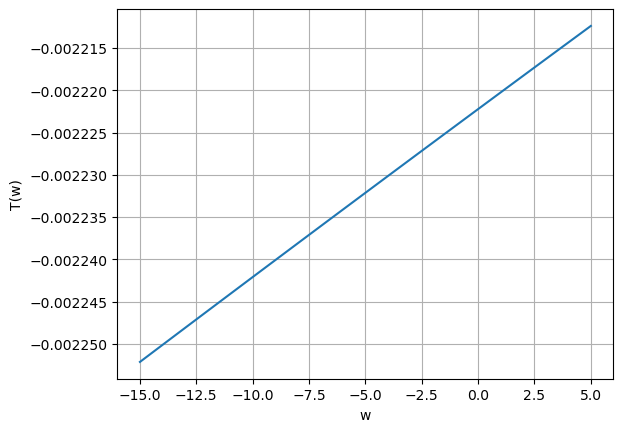

In [126]:
plt.plot(x, R)
plt.grid()
plt.xlabel('w')
plt.ylabel('T(w)')
plt.show()